<a href="https://colab.research.google.com/github/YangHyunu/SKT-FLY-AI-5/blob/main/4%EC%A3%BC%EC%B0%A8/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98/%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 횟수 기반 임베딩

*   카운터 벡터
*   TF-IDF



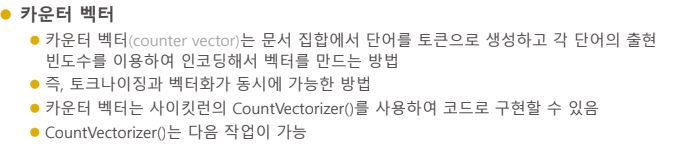



1.   토큰화: 문장을 단어로 분리.
    - 'This is last chance.' -> ['This', 'is', 'last', 'chance']
2.   소문자 변환: 모든 단어를 소문자로 변환.
    - ['This', 'is', 'last', 'chance'] -> ['this', 'is', 'last', 'chance']
3.   단어 추출: 특수문자와 같은 불필요한 요소를 제거하고, 단어를 추출.
4.   단어 인덱싱: 고유한 단어에 인덱스를 부여 하고 단어 사전 생성
    - {'this': 11, 'is': 4, 'last': 5, 'chance': 2, 'and': 0, 'if': 3, 'you': 13, 'do': 1, 'not': 7, 'have': 6, 'will': 12, 'never': 8, 'get': 10, 'any': 9, 'one': 8, 'please': 10}


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is last chance.',
    'and if you do not have this chance.',
    'you will never get any chance.',

    'will you do get this one?',
    'please, get this chance',
]
vect = CountVectorizer() # 카운터 벡터  객체 생성
vect.fit(corpus)  # 고유한 단어에 인덱스를 부여
vect.vocabulary_

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [ ]:
vect.transform(corpus).toarray() # 벡터화된 행렬

array([[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]])

In [ ]:
vect.transform(['you will never get any chance.']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]])

In [ ]:
vect = CountVectorizer(stop_words=['and','is','please','this']).fit(corpus)
vect.vocabulary_ # 불용어를 제거한 카운터 벡터

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

- TF-IDF를 이용한 임베딩

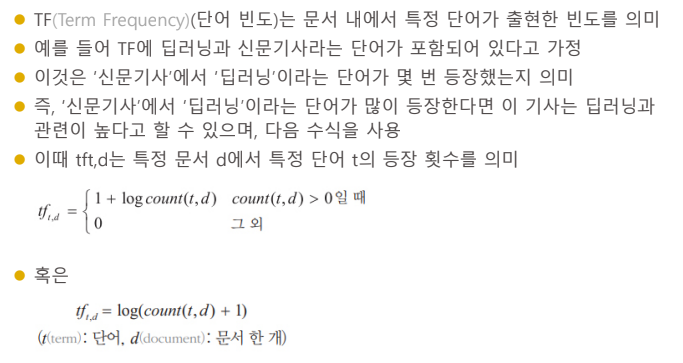
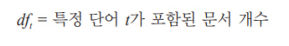
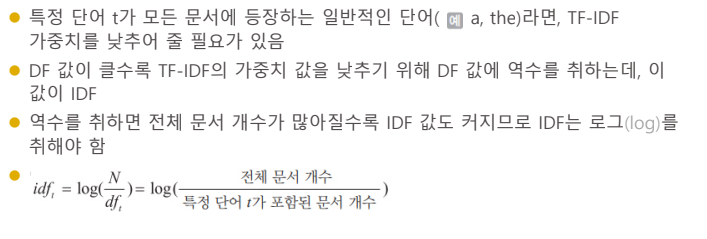
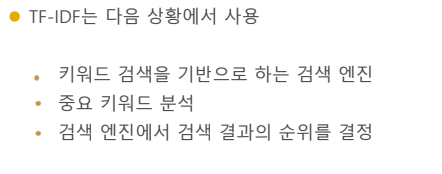

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc = ['I like machine learning', 'I love deep learning', 'I run everyday']
tfidf_vectorizer = TfidfVectorizer(min_df=1) # 한 개 이상의 문서에 등장하는 단어만 포함됨.
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T)
print ('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_shape()[1]), 'matrix를 만들었습니다.')
print(doc_distance.toarray())

유사도를 위한 3 x 3 matrix를 만들었습니다.
[[1.       0.224325 0.      ]
 [0.224325 1.       0.      ]
 [0.       0.       1.      ]]


#10.1.3 예측기반 임베딩
# Word2Vec

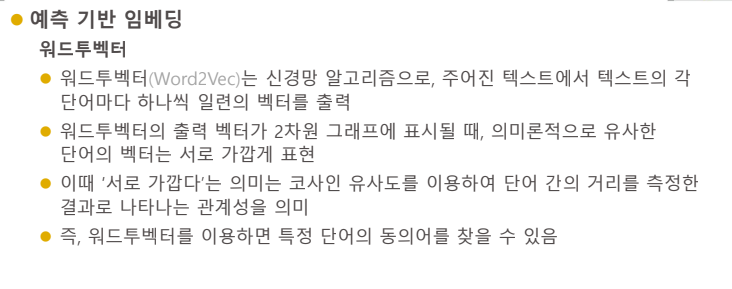
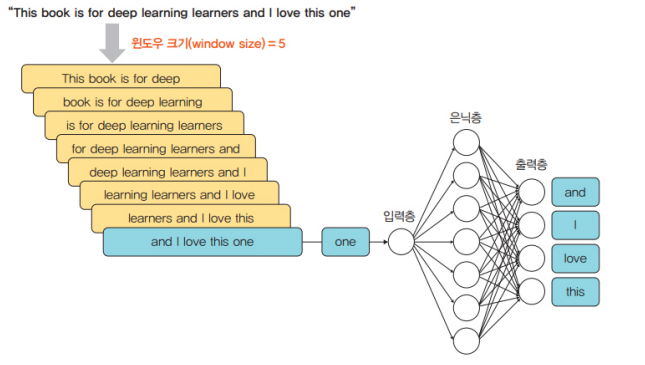

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action='ignore')
import gensim
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

sample = open('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/peter.txt','r',encoding='utf-8')
s= sample.read()
s

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'Once upon a time in London, the darlings went out to a dinner party leaving their three children Wendy, Jhon, and Michael at home. After Wendy had tucked her younger brothers Jhon and Michael to bed, she went to read a book. She heard a boy sobbing outside her window. He was flying. There was little fairy fluttering around him. Wendy opened the window to talk to him.\n\n“Hello! Who are you? Why are you crying ”, wendy asked him. “My name is Peter Pan. my shadow wouldn’t stock to me.”, He replied. She asked him to come in. Peter agreed and came inside the room. Wendy took his shadow and sewed it to his shoe tips.\n\nNow his shadow followed him wherever Peter Pan went! He was delighted and asked Wendy “Why don’t you come with me to my home. The Neverland. I lived there with my fairy Tinker Bell.” Wendy ? “Oh! What a wonderful idea! Let me wake up John and Micheal too. Could you teach us how to fly?”. “Yes! Of course! Get them we will all fly together.” Peter Pan replied\n\nAnd so it was

In [ ]:
f = s.replace("\n", " ")
data =[]

for i in sent_tokenize(f):
  temp =[]
  for j in word_tokenize(i):
    temp.append(j.lower())
  data.append(temp)

In [ ]:
data # Corpus 에 토큰화를 진행한 결과

[['once',
  'upon',
  'a',
  'time',
  'in',
  'london',
  ',',
  'the',
  'darlings',
  'went',
  'out',
  'to',
  'a',
  'dinner',
  'party',
  'leaving',
  'their',
  'three',
  'children',
  'wendy',
  ',',
  'jhon',
  ',',
  'and',
  'michael',
  'at',
  'home',
  '.'],
 ['after',
  'wendy',
  'had',
  'tucked',
  'her',
  'younger',
  'brothers',
  'jhon',
  'and',
  'michael',
  'to',
  'bed',
  ',',
  'she',
  'went',
  'to',
  'read',
  'a',
  'book',
  '.'],
 ['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.'],
 ['he', 'was', 'flying', '.'],
 ['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.'],
 ['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.'],
 ['“', 'hello', '!'],
 ['who', 'are', 'you', '?'],
 ['why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.'],
 ['“', 'my', 'name', 'is', 'peter', 'pan', '.'],
 ['my',
  'shadow',
  'wouldn',
  '’',
  't',
  'stock',
  'to',
  'me.',
  '”',
  ',',
  'he',
  'rep

### CBOW


*   CBOW(Continuous Bag Of Words)는 **단어를 여러 개** 나열한 후 이와 관련된 **단어를 추정**하는 방식.


*   즉, 문장에서 등장하는 **n개의 단어 열에서** 다음에 등장할 단어를 **예측**.


* 예를 들어 "calm cat slept on the sofa"라는 문장이 있을 때, "calm cat on the sofa"라는 문맥이 주어지면 "slept"를 예측하는 것이 CBOW입니다.

* 각 문맥 단어를 은닉층으로 투사하는 **가중치 행렬**은 모든 단어에서 공통으로 사용됨.


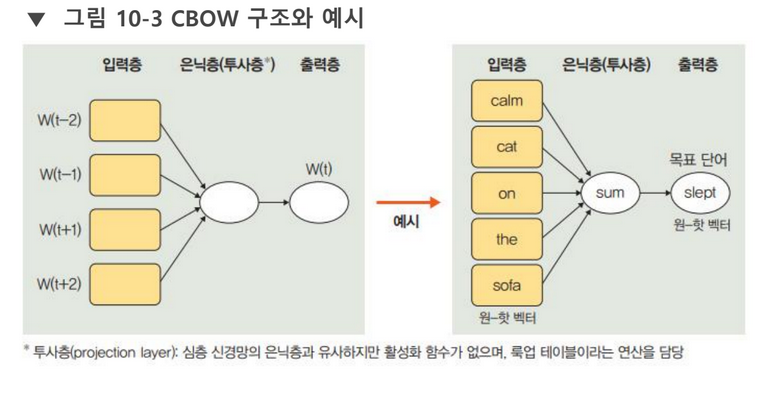

In [ ]:
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window =5,sg=0) # 단어의 최소 빈도수=1, 임베딩된 벡터의 차원 =100
# sg=0 일 때 CBOW , 1일 떄 Skip-gram
print("Cosine similarity between 'peter' "+ "'wendy' - CBOW: ",
      model1.wv.similarity('peter', 'wendy'))

Cosine similarity between 'peter' 'wendy' - CBOW:  -0.08923974


피터와 왼디 사이에 코사인 유사도가 99.99%로 나타남

In [ ]:
print("Cosine similarity between 'peter' "+ "'hook' - CBOW: ",
      model1.wv.similarity('peter', 'hook'))

Cosine similarity between 'peter' 'hook' - CBOW:  0.030469554


피터와 후크의 유사성은 1%가 채 안됨
- 즉, CBOW 방식은 문맥에서 드문 단어를 파악하는데 약점을 보임

- 즉, CBOW 는 **문맥<여러 단어>**를 **입력**받아 **한 단어**를 예측 및 출력
- 한번에 여러 단어의 정보를 사용하므로 학습 속도가 빠름
- 성능: 문맥 기반의 **일반적인 단어** 예측에 강함

### Skip-gram
- **Skip-gram** 방식은 CBOW 방식과 반대로 **특정한 단어**에서 **문맥**이 될 수 있는 단어를 예측
- 즉, Skip-gram은 다음 그림과 같이 **중심 단어**에서 주변 단어를 예측하는 방식을 사용
- 예를 들어 다음 그림과 같이 중심 단어 'slept'을 이용하여 그 앞과 뒤의 단어들을 유추하는 것이 Skip-gram

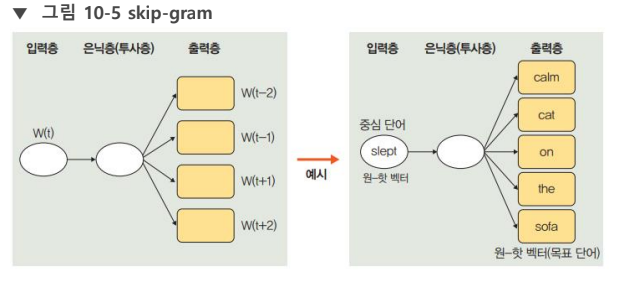
- 즉, ‘slept’를 입력받아 앞 뒤 단어인  [’calm’,’cat’,’on’,’the’,’soda’] 를 예측

In [ ]:
model2 = gensim.models.Word2Vec(data, min_count=1 , vector_size=100, window=5, sg=1)

print("Cosine similarity between 'peter' "+ "'wendy' - Skip Gram: ",
      model2.wv.similarity('peter', 'wendy'))

Cosine similarity between 'peter' 'wendy' - Skip Gram:  0.28732824


In [ ]:
print("Cosine similarity between 'peter' "+ "'hook' - Skip Gram: ",
      model2.wv.similarity('peter', 'hook'))

Cosine similarity between 'peter' 'hook' - Skip Gram:  0.5432895


- CBOW와 반대로 peter와 hook 사이의 유사도를 peter와 wendy 사이의 유사도 보다 높게 평가함 .
- 문맥을 예측하는 데 강함

- 드문 단어의 **문맥**을 **예측**하는 데 강함
- **중심 단어**를 통해 **주변 단어**를 예측
- 한 단어를 입력으로 받아 다수의 단어를 출력.
- 각 단어에 대해 개별적으로 학습하므로 느릴 수 있음.


### 패스트텍스트

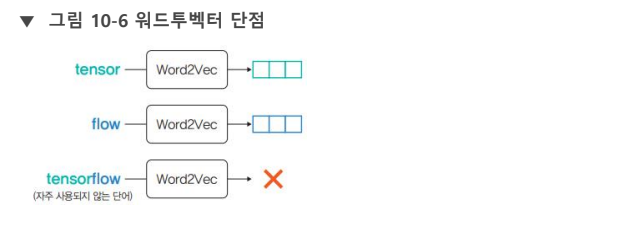
- **패스트텍스트**는 인공 신경망을 이용하여 학습이 완료된 후 데이터셋의 모든 단어를 각 **n-그램**에 대해 임베딩
- **사전에 없는 단어**가 등장한다면 n-그램으로 분리된 부분 단어와 **유사도를 계산**하여 의미를 유추할 수 있음



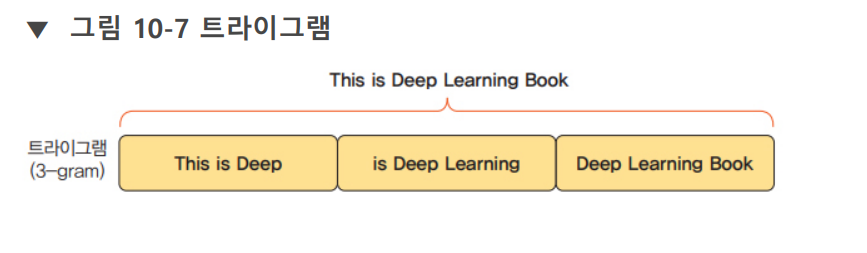

- 예를 들어 n을 3으로 설정 (트라이그램 (trigram))하면 ‘This is Deep Learning Book’은 This is Deep, is Deep Learning, Deep Learning Book으로 분리한 후 임베딩

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import FastText
model = FastText('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/peter.txt',vector_size=4,window=3,min_count=1,epochs=10)

In [ ]:
model

In [ ]:
sim_score = model.wv.similarity('peter','wendy')
print(sim_score) # peter와 wendy의 코사인 유사도 결과

0.4592452


In [ ]:
from __future__ import print_function
from gensim.models import KeyedVectors

model_kr = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/wiki.ko.vec')

In [ ]:
find_similar_to = '노력'
for similar_word in model_kr.similar_by_word(find_similar_to):
  print("Word: {0}, Similarity: {1:.2f}".format(
      similar_word[0],similar_word[1]
  ))

Word: 노력함, Similarity: 0.80
Word: 노력중, Similarity: 0.75
Word: 노력만, Similarity: 0.72
Word: 노력과, Similarity: 0.71
Word: 노력의, Similarity: 0.69
Word: 노력가, Similarity: 0.69
Word: 노력이나, Similarity: 0.69
Word: 노력없이, Similarity: 0.68
Word: 노력맨, Similarity: 0.68
Word: 노력보다는, Similarity: 0.68


In [ ]:
similarities = model_kr.most_similar(positive=['동물','육식동물'],negative=['사람'])
print(similarities) #사람과 관계가 없으면서 동물과 관련된 단어들을 보여주고 있음

[('초식동물', 0.7804122567176819), ('거대동물', 0.7547270655632019), ('육식동물의', 0.7547166347503662), ('유두동물', 0.753511369228363), ('반추동물', 0.7470757961273193), ('독동물', 0.7466291785240173), ('육상동물', 0.746031641960144), ('유즐동물', 0.7450903654098511), ('극피동물', 0.7449344396591187), ('복모동물', 0.742434561252594)]


## GloVe
  - 횟수/예측기반 임베딩
  - skip-gram 기반 + TF-IDF<통계>

GloVe (Global Vectors for Word Representation)

GloVe는 횟수 기반의 LSA(Latent Semantic Analysis, 잠재 의미 분석)와 예측 기반의 워드투벡터 단점을 보완하기 위해 고안된 모델

- 통계 정보 + Skip-gram 방식: 단어에 대한 통계 정보와 skip-gram 방식을 합친 방식

- 통계적 기반: 다시 풀어서 이야기하면 skip-gram 방법을 사용하되 통계적 기반이 추가된 것

- 단어 간 관련성 표현: GloVe를 사용하면 단어 간 관련성을 통계적 방법으로 표현해줌

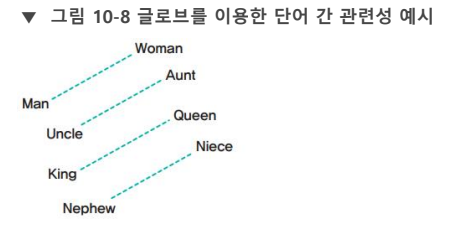

In [ ]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = '/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/glove.6B.100d.txt'
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)  # 글로브 데이터를 웨드투벡터 형태로 변환

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
model.most_similar('bill')

In [ ]:
model.most_similar('nvidia')

In [ ]:
model.most_similar(negative='nvidia')

- king과 women과 비슷하고, man과 비슷하지 않은 것

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

- 맥주와 프랑스와 관련성이 있으면서 호주와 관계없는 단어 반환

In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('australia', 'beer', 'france')

In [ ]:
analogy('tall', 'tallest', 'long')

In [ ]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

In [ ]:
analogy('skt','kt','lg')

In [ ]:
analogy('machine','ai','human')

In [ ]:
analogy('mathematics','statistics','computer')

In [ ]:
analogy('statistics','mathematics','computer')

## 트랜스포머
  ### BERT

In [ ]:
!pip --q install transformers
!pip --q install pytorch-transformers

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from pytorch_transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/training.txt', sep='\t')
valid_df = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/validing.txt', sep='\t')
test_df = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/testing.txt', sep='\t')

In [ ]:
train_df = train_df.sample(frac=0.1, random_state=500)
valid_df = valid_df.sample(frac=0.1, random_state=500)
test_df = test_df.sample(frac=0.1, random_state=500)

In [ ]:
class Datasets(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx): # 데이터셋에서 데이터 가져오는 부분
        text = self.df.iloc[idx, 1]
        label = self.df.iloc[idx, 2]
        return text, label

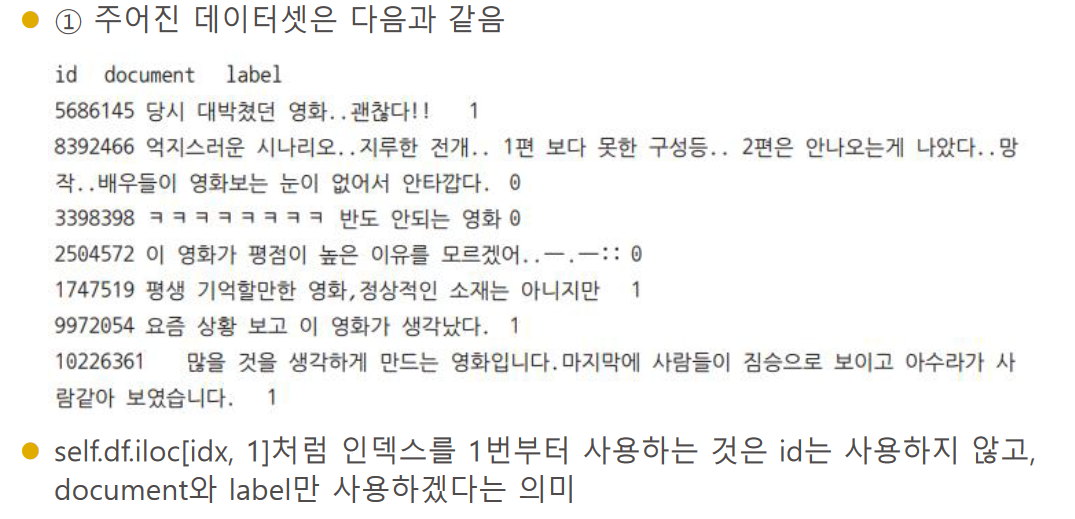

- 데이터셋의 데이터를 데이터로더에 전달

In [ ]:
train_dataset = Datasets(train_df)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)

valid_dataset = Datasets(valid_df)
valid_loader = DataLoader(valid_dataset, batch_size=2, shuffle=True, num_workers=0)

test_dataset = Datasets(test_df)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True, num_workers=0)

- 토큰화를 진행하기 위해 버트 토크나이저를 내려받음
- pretrained 된 버트 모델을 기반으로 객체 생성

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

- 최적의 모델을 저장하기 위한 함수

In [ ]:
def save_checkpoint(save_path, model, valid_loss):
    if save_path == None:
        return
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}

    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    if load_path==None:
        return
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')

    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']
# 훈련, 검증에 대한 오차와 에포크 저장
def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):
    if save_path == None:
        return
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')
# save_metrics에 저장해 둔 정보 불러오기
def load_metrics(load_path):
    if load_path==None:
        return
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

### 훈련 함수 정의

In [ ]:
def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          num_epochs = 5,
          eval_every = len(train_loader) // 2,
          best_valid_loss = float("Inf")):

    total_correct = 0.0
    total_len = 0.0
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    model.train()
    for epoch in range(num_epochs):
        for text, label in train_loader:
            optimizer.zero_grad()
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
            padded_list =  [e + [0] * (512-len(e)) for e in encoded_list]

            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)
            labels = torch.tensor(label)
            outputs = model(sample, labels=labels)
            loss, logits = outputs

            pred = torch.argmax(F.softmax(logits), dim=1)
            correct = pred.eq(labels)
            total_correct += correct.sum().item()
            total_len += len(labels)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()
            global_step += 1

            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():
                    for text, label in valid_loader:
                        encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
                        padded_list =  [e + [0] * (512-len(e)) for e in encoded_list]
                        sample = torch.tensor(padded_list)
                        sample, label = sample.to(device), label.to(device)
                        labels = torch.tensor(label)
                        outputs = model(sample, labels=labels)
                        loss, logits = outputs
                        valid_running_loss += loss.item()

                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                running_loss = 0.0
                valid_running_loss = 0.0
                model.train()

                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))

                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/model.pt', model, best_valid_loss)
                    save_metrics('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)

    save_metrics('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('훈련 종료!')

- 옵티마이저 정의 및 적합

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=2e-5)
train(model=model, optimizer=optimizer)

Epoch [1/5], Step [510/5100], Train Loss: 0.7095, Valid Loss: 0.6994
Model saved to ==> /content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/model.pt
Model saved to ==> /content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/metrics.pt
Epoch [1/5], Step [1020/5100], Train Loss: 0.7084, Valid Loss: 0.6944
Model saved to ==> /content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/model.pt
Model saved to ==> /content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/metrics.pt
Epoch [2/5], Step [1530/5100], Train Loss: 0.7044, Valid Loss: 0.6950
Epoch [2/5], Step [2040/5100], Train Loss: 0.7035, Valid Loss: 0.7097
Epoch [3/5], Step [2550/5100], Train Loss: 0.7119, Valid Loss: 0.7001
Epoch [3/5], Step [3060/5100], Train Loss: 0.7018, Valid Loss: 0.6933
Model saved to ==> /content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/model.pt
Model saved to ==> /content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/metrics.pt
Epoch [4/5], Step [3570/5100], Train Loss: 0.7022, Valid Loss: 0.7084
Epoch [

- 학습 결과는 훈련과 검증 데이터셋의 오차를 보여 주는데, 훈련이 진행될수록
- 훈련 데이터셋의 오차는 감소하고 있지만 검증 데이터셋에 대한 오차는
- 일정하지 않게 나타나고 있음

Model loaded from <== /content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/metrics.pt


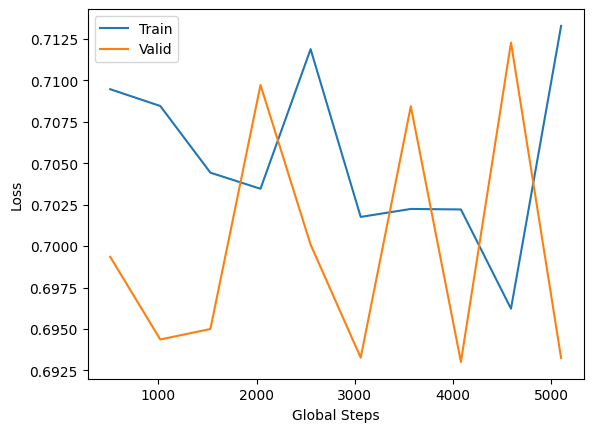

In [ ]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/metrics.pt')

plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 모델 평가 함수  정의

In [ ]:
def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval() # 모델을 평가 모드로 바꿈
    with torch.no_grad():
        for text, label in test_loader: # 데이터를 배치단위로 가져옴

            # 각 텍스트를 토큰화하고 패딩을 추가하여 길이를 512로 맞춤 나머지 인덱스에는 다 0으로 패딩
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
            padded_list =  [e + [0] * (512-len(e)) for e in encoded_list]

            # 텐서로 변환하고 모델을 장치(gpu)로 이동
            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)
            labels = torch.tensor(label)

            # 모델에 샘플<입력 데이터>과 레이블을 입력으로 전달하여 출력 계산
            output = model(sample, labels=labels)

            # 모델 출력에서 logits<각 클래스에 대한 예측값 >만 추출
            _, output = output

            # to.list()로 텐서를 파이썬의 리스트로 변환
            # 리스트에
            y_pred.extend(torch.argmax(output, 1).tolist())
            y_true.extend(labels.tolist())

    # 분류 결과 출력
    print('Classification 결과:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

    # 혼동 행렬 계산 및 시각화
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])


Model loaded from <== /content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/model.pt
Classification 결과:
              precision    recall  f1-score   support

           1     0.5091    1.0000    0.6747       558
           0     0.0000    0.0000    0.0000       538

    accuracy                         0.5091      1096
   macro avg     0.2546    0.5000    0.3374      1096
weighted avg     0.2592    0.5091    0.3435      1096



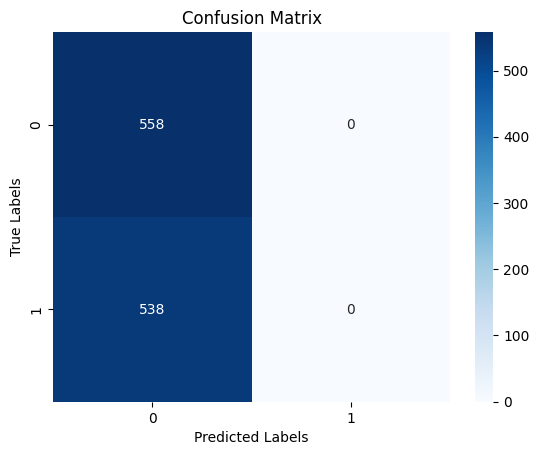

In [ ]:
best_model = model.to(device)
load_checkpoint('/content/drive/MyDrive/SKT_FLY_AI /4주차 파이토치/data/model.pt', best_model)
evaluate(best_model, test_loader)